In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
train= pd.read_csv('train.csv')
test = pd.read_csv('testFeatures.csv')

In [3]:
train.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [4]:
train.shape

(227520, 8)

In [5]:
train.isna().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [6]:
train.duplicated().sum()

0

In [7]:
train["tarih"]= pd.to_datetime(train["tarih"])

train["Yıl"] = train["tarih"].dt.year
train["Ay"] = train["tarih"].dt.month
train["Gün"] = train["tarih"].dt.day
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tarih              227520 non-null  datetime64[ns]
 1   ürün               227520 non-null  object        
 2   ürün besin değeri  227520 non-null  int64         
 3   ürün kategorisi    227520 non-null  object        
 4   ürün fiyatı        227520 non-null  float64       
 5   ürün üretim yeri   227520 non-null  object        
 6   market             227520 non-null  object        
 7   şehir              227520 non-null  object        
 8   Yıl                227520 non-null  int64         
 9   Ay                 227520 non-null  int64         
 10  Gün                227520 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 19.1+ MB


In [8]:
test.shape

(45504, 8)

In [9]:
test.isna().sum()

id                   0
tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [10]:
test.duplicated().sum()

0

In [11]:
test['tarih'] = pd.to_datetime(test['tarih'])

test["Yıl"] = test["tarih"].dt.year
test["Ay"] = test["tarih"].dt.month
test["Gün"] = test["tarih"].dt.day
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 45504 non-null  int64         
 1   tarih              45504 non-null  datetime64[ns]
 2   ürün               45504 non-null  object        
 3   ürün besin değeri  45504 non-null  int64         
 4   ürün kategorisi    45504 non-null  object        
 5   ürün üretim yeri   45504 non-null  object        
 6   market             45504 non-null  object        
 7   şehir              45504 non-null  object        
 8   Yıl                45504 non-null  int64         
 9   Ay                 45504 non-null  int64         
 10  Gün                45504 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 3.8+ MB


In [12]:
test.head()

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,Yıl,Ay,Gün
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A,2021,1,1
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A,2021,1,1
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A,2021,1,1
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A,2021,1,1
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A,2021,1,1


In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ürün besin değeri,227520.0,143.113924,133.218871,8.00,41.00,83.0,250.00,402.00
ürün fiyatı,227520.0,16.348622,13.260935,0.73,7.33,12.6,20.90,141.33
Yıl,227520.0,2018.000000,1.414217,2016.00,2017.00,2018.0,2019.00,2020.00
Ay,227520.0,6.500000,3.452060,1.00,3.75,6.5,9.25,12.00
Gün,227520.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00


In [14]:
train["ürün"].value_counts()

kıyma            2880
salam            2880
Çilek            2880
Armut            2880
tereyağ          2880
                 ... 
Nohut            2880
Mercimek-kuru    2880
Marul            2880
Mantar           2880
ceviz            2880
Name: ürün, Length: 79, dtype: int64

In [15]:
train["ürün kategorisi"].value_counts()

sebze ve bakliyat              83520
meyve                          51840
tahıl ve ürünleri              34560
süt ürünleri ve kahvaltılık    34560
kuruyemiş                      14400
et                              8640
Name: ürün kategorisi, dtype: int64

In [16]:
train.groupby('ürün kategorisi').mean()['ürün fiyatı']

ürün kategorisi
et                             35.722958
kuruyemiş                      30.049149
meyve                           9.992867
sebze ve bakliyat              14.909769
süt ürünleri ve kahvaltılık    25.619672
tahıl ve ürünleri               9.536299
Name: ürün fiyatı, dtype: float64

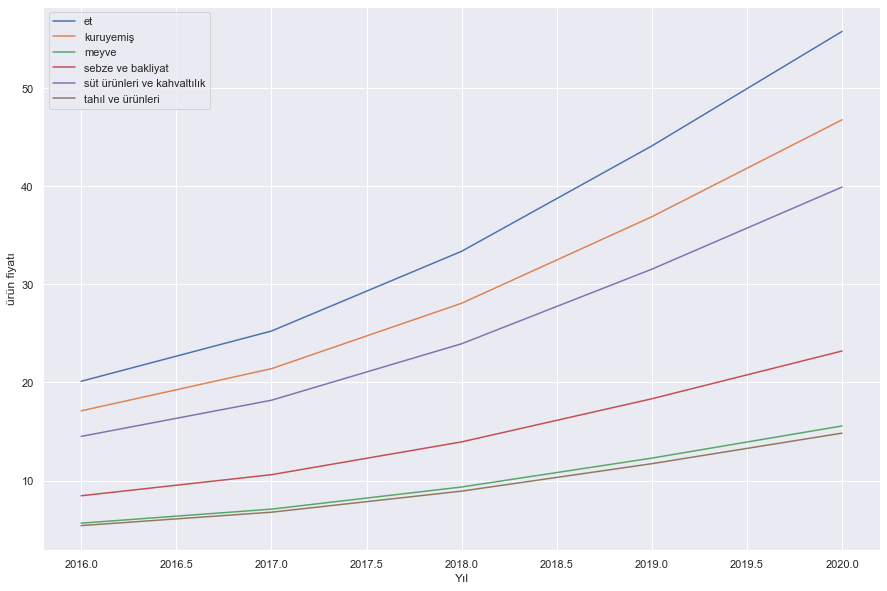

In [17]:
categories = ['et','kuruyemiş','meyve','sebze ve bakliyat','süt ürünleri ve kahvaltılık','tahıl ve ürünleri']
for i in range(6):
    dt= pd.DataFrame(train.loc[lambda train: train["ürün kategorisi"]==categories[i]].groupby(["Yıl","ürün kategorisi"])["ürün fiyatı"].mean())
    sns.lineplot(data=dt, x="Yıl", y="ürün fiyatı", label= "{}".format(categories[i]))


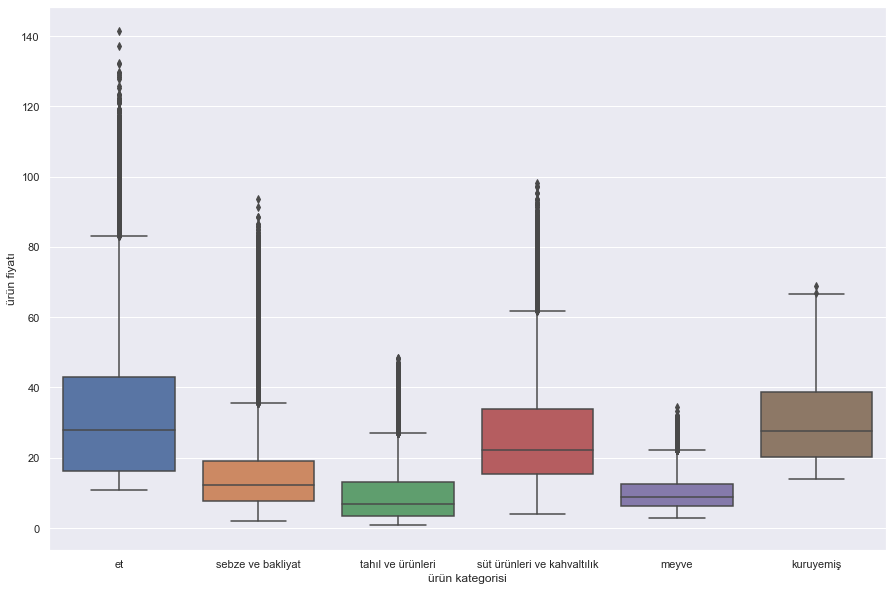

In [18]:
ax = sns.boxplot(x="ürün kategorisi", y="ürün fiyatı", data=train) 

In [19]:
new_data = pd.DataFrame()
for i in range(len(categories)):
    dataa= train[train['ürün kategorisi'] == categories[i]]
    max_value = (3*dataa["ürün fiyatı"].std()) + dataa["ürün fiyatı"].mean()  # finds the max value that is not going to be called not an outlier
    min_value = -((3*dataa["ürün fiyatı"].std()) + dataa["ürün fiyatı"].mean())  # finds the min value that is not going to be called not an outlier

    mean = dataa.loc[(dataa["ürün fiyatı"] > min_value) & (dataa["ürün fiyatı"] < max_value), ["ürün fiyatı"]].mean()  # calculate the new mean of the column without the outlier values
    # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
    if mean is not np.nan:  
        dataa.loc[(dataa["ürün fiyatı"] < min_value) | (dataa["ürün fiyatı"] > max_value), ["ürün fiyatı"]] = mean  # change outlier values with mean
        dataa["ürün fiyatı"].fillna(dataa["ürün fiyatı"].mean(), inplace=True)  # also fill nan values with mean
    else:  # this condition means there is no outlier value in the column
        dataa["ürün fiyatı"].fillna(dataa["ürün fiyatı"].mean(), inplace=True)  # just fill nan values with mean
    new_data= pd.concat([new_data, dataa])

C:\Users\dell\AppData\Local\Temp\ipykernel_9816\4032123530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa["ürün fiyatı"].fillna(dataa["ürün fiyatı"].mean(), inplace=True)  # also fill nan values with mean
C:\Users\dell\AppData\Local\Temp\ipykernel_9816\4032123530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa["ürün fiyatı"].fillna(dataa["ürün fiyatı"].mean(), inplace=True)  # also fill nan values with mean
C:\Users\dell\AppData\Local\Temp\ipykernel_9816\4032123530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [20]:
new_data.isna().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
Yıl                  0
Ay                   0
Gün                  0
dtype: int64

In [21]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ürün besin değeri,227520.0,143.113924,133.218871,8.00,41.00,83.00,250.00,402.0
ürün fiyatı,227520.0,15.810185,12.295087,0.73,7.33,12.47,20.36,112.2
Yıl,227520.0,2018.000000,1.414217,2016.00,2017.00,2018.00,2019.00,2020.0
Ay,227520.0,6.500000,3.452060,1.00,3.75,6.50,9.25,12.0
Gün,227520.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ürün fiyatı', ylabel='Density'>

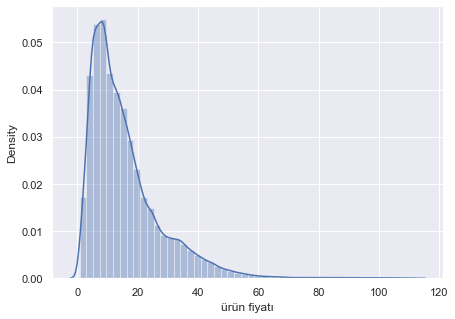

In [22]:
plt.figure(figsize=(7,5))
sns.distplot(new_data["ürün fiyatı"])

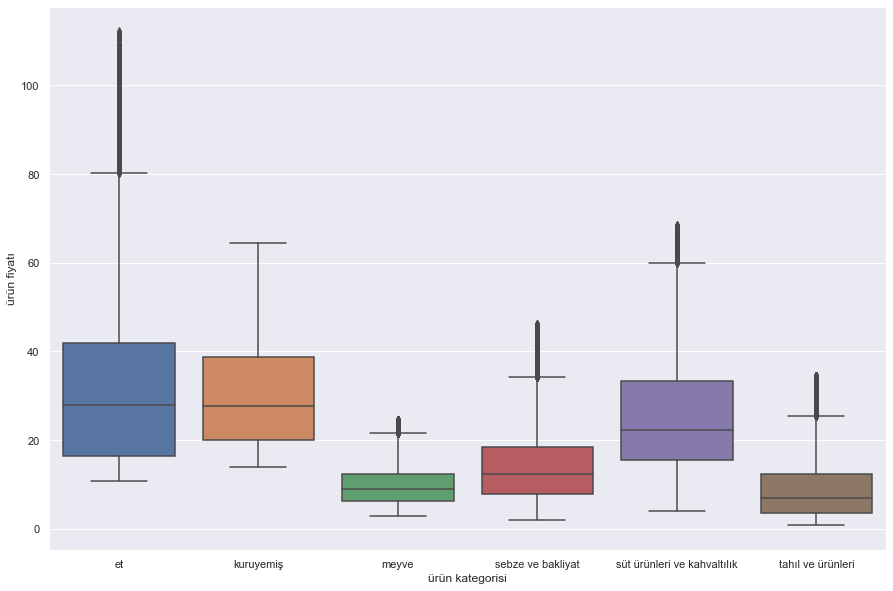

In [23]:
ax = sns.boxplot(x="ürün kategorisi", y="ürün fiyatı", data=new_data) 

In [24]:
new_data.select_dtypes(include=[object])

,ürün,ürün kategorisi,ürün üretim yeri,market,şehir
0,kıyma,et,Yurt içi,M,A
1,tavuk,et,Yurt içi,M,A
2,hindi,et,Yurt içi,M,A
79,kıyma,et,Yurt dışı,M,A
80,tavuk,et,Yurt dışı,M,A
...,...,...,...,...,...
227480,Pilav,tahıl ve ürünleri,Yurt dışı,B,H
227481,Pirinç unu,tahıl ve ürünleri,Yurt dışı,B,H
227482,Şehriye,tahıl ve ürünleri,Yurt dışı,B,H
227483,Tarhana,tahıl ve ürünleri,Yurt dışı,B,H


In [25]:
new_data.tail()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,Yıl,Ay,Gün
227480,2020-12-01,Pilav,368,tahıl ve ürünleri,13.880000,Yurt dışı,B,H,2020,12,1
227481,2020-12-01,Pirinç unu,353,tahıl ve ürünleri,21.420000,Yurt dışı,B,H,2020,12,1
227482,2020-12-01,Şehriye,390,tahıl ve ürünleri,20.950000,Yurt dışı,B,H,2020,12,1
227483,2020-12-01,Tarhana,329,tahıl ve ürünleri,10.790000,Yurt dışı,B,H,2020,12,1
227484,2020-12-01,Yulaf unu,402,tahıl ve ürünleri,8.926584,Yurt dışı,B,H,2020,12,1


In [26]:
train.head()
#pd.get_dummies(train)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,Yıl,Ay,Gün
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,2016,1,1
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,2016,1,1
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,2016,1,1
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,2016,1,1
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,2016,1,1


In [27]:
'''X = train[["ürün","ürün kategorisi","ürün üretim yeri","market","şehir"]]
y = train[["ürün fiyatı"]]'''

'X = train[["ürün","ürün kategorisi","ürün üretim yeri","market","şehir"]]\ny = train[["ürün fiyatı"]]'

In [28]:
X = new_data[["ürün","ürün kategorisi","ürün üretim yeri","market","şehir"]]
y = np.log(new_data[["ürün fiyatı"]])

In [29]:
#= pd.read_csv('test_Features.csv')
data = pd.get_dummies(X)


In [30]:
data.head()

,ürün_Armut,ürün_Bakla-kuru,ürün_Bakla-taze,ürün_Bamya,ürün_Barbunya-kuru,ürün_Bezelye-taze,ürün_Biber-yeşil,ürün_Brüksel laha.,ürün_Bulgur,ürün_Buğday ekmeği,...,market_C,market_M,şehir_A,şehir_B,şehir_C,şehir_D,şehir_E,şehir_F,şehir_G,şehir_H
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size=0.2,random_state=10)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
x_train = scaler.fit_transform(x_train)

In [35]:
x_test = scaler.transform(x_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [37]:
x_train.shape

(182016, 98)

In [38]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="mse")


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=300,epochs=10)

Epoch 1/10
607/607 [==============================] - 7s 8ms/step - loss: 2.8807 - val_loss: 0.4942
Epoch 2/10
607/607 [==============================] - 4s 7ms/step - loss: 0.3600 - val_loss: 0.2712
Epoch 3/10
607/607 [==============================] - 4s 7ms/step - loss: 0.2240 - val_loss: 0.1918
Epoch 4/10
607/607 [==============================] - 4s 6ms/step - loss: 0.1738 - val_loss: 0.1613
Epoch 5/10
607/607 [==============================] - 2s 3ms/step - loss: 0.1544 - val_loss: 0.1496
Epoch 6/10
607/607 [==============================] - 2s 3ms/step - loss: 0.1470 - val_loss: 0.1451
Epoch 7/10
607/607 [==============================] - 2s 4ms/step - loss: 0.1441 - val_loss: 0.1434
Epoch 8/10
607/607 [==============================] - 2s 4ms/step - loss: 0.1427 - val_loss: 0.1425
Epoch 9/10
607/607 [==============================] - 2s 3ms/step - loss: 0.1419 - val_loss: 0.1417
Epoch 10/10
607/607 [==============================] - 2s 3ms/step - loss: 0.1413 - val_loss: 0.1413

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
pred_array = model.predict(x_test)

In [44]:
pred_array

array([[3.0342057 ],
       [1.8206517 ],
       [3.3398275 ],
       ...,
       [0.38846755],
       [3.6259391 ],
       [2.5795224 ]], dtype=float32)

In [45]:
ypredd=pd.DataFrame(pred_array)

In [46]:
testf = pd.read_csv("testFeatures.csv")

In [47]:
xtest = testf[["ürün","ürün kategorisi","ürün üretim yeri","market","şehir"]]


In [48]:
testf

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45499,45499,2021-12-01,fındık,110,kuruyemiş,Yurt dışı,B,H
45500,45500,2021-12-01,fıstık,115,kuruyemiş,Yurt dışı,B,H
45501,45501,2021-12-01,kaju,100,kuruyemiş,Yurt dışı,B,H
45502,45502,2021-12-01,badem,110,kuruyemiş,Yurt dışı,B,H


In [49]:
deneme= pd.get_dummies(xtest)

In [50]:
y_predd = model.predict(deneme)


In [ ]:
ypredd=pd.DataFrame(y_predd)

In [ ]:
testf['ürün fiyatı']= y_predd

In [ ]:
testf[['ürün fiyatı']].to_csv('solutionss.csv')